**Задание 1**

Сгенерируйте случайную симметричную матрицу $A$ размера $3 × 3$. Сгенерируйте $N$ элементов из нормального распределения $P ∝ e^{x^TAx}$ (получится матрица объект-признак $X$ размерности $N×3$). Визуализируйте полученное
облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом *ipympl* в
системе *jupyter*). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с
облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
A = sps.norm.rvs(size = (3, 3))
A = A.T @ A
N = 100

In [3]:
distr = sps.multivariate_normal(mean = [0, 0, 0], cov = A)
X = distr.rvs(size = N)
print(X.shape)

(100, 3)


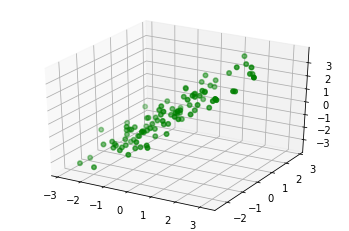

In [4]:


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'o', linewidth=1.5, color = "green")

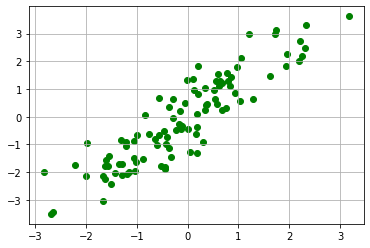

In [5]:
fig, ax = plt.subplots()
ax.grid(True)
ax.scatter(X[:, 0], X[:, 2], color = "green")

-3.729655473350135e-17


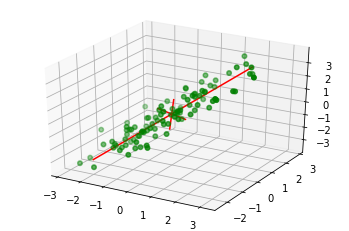

In [6]:
u, s, vt = np.linalg.svd(X)
t = np.linspace(-0.2, 0.2, 100)
vt0 = vt[0, :].reshape(3, 1) * t * s[0]
vt1 = vt[1, :].reshape(3, 1) * t * s[1]
vt2 = vt[2, :].reshape(3, 1) * t * s[2]

print((vt2[:, 0] - vt2[:, 10]) @ vt[1, :])

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'o', linewidth=1.5, color = "green")
ax.plot(vt0[0], vt0[1], vt0[2], linewidth=1.5, color = 'r')
ax.plot(vt1[0], vt1[1], vt1[2], linewidth=1.5, color = 'r')
ax.plot(vt2[0], vt2[1], vt2[2], linewidth=1.5, color = 'r')

In [7]:
vt[0] @ vt[2]

0.0

In [8]:
!pip install -q ipympl

     |████████████████████████████████| 510 kB 5.6 MB/s 
     |████████████████████████████████| 9.4 MB 9.5 MB/s 
     |████████████████████████████████| 1.6 MB 10.4 MB/s 
     |████████████████████████████████| 295 kB 47.5 MB/s 
     |████████████████████████████████| 965 kB 12.4 MB/s 


In [9]:
%matplotlib widget
from IPython.display import Javascript
import matplotlib.pyplot as plt
import numpy as np

# This enables custom widgets in the current cell's output.
# Currently this must be included in each cell using custom widgets but this
# should be a temporary restriction.
display(Javascript('''
  google.colab.widgets.installCustomManager('http://127.0.0.1:9897/manager.dev.js');
'''))

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

<IPython.core.display.Javascript object>

NotImplementedError: ignored